In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_polls=pd.read_excel('answers.xlsx')
df_polls.head()

,id_question,User_ID,Scenario,selected_choice,time_taken,winner,utility_choice,sample_size,diff_type,most_preffer,least_preffer
0,150,7495105117,A,red,2.76186,blue,0,100,small,1,2
1,151,7495105117,A,red,1.27974,red,100,100,small,1,2
2,152,7495105117,A,red,1.07823,blue,0,100,small,1,2
3,153,7495105117,A,red,1.36203,blue,0,100,medium,1,2
4,154,7495105117,A,red,1.47306,red,100,100,medium,1,2


## **Voters' Selected Option Distribution When the Prefered Candidate is the leader/last**

In [3]:
lst_diff_types= list(df_polls['diff_type'].unique())
prefer_least=[1,2]
lst_dfs=[]
for i in lst_diff_types:
    for j in prefer_least:
        filtered_df= df_polls[(df_polls['diff_type'] == i) & (df_polls['most_preffer'] == j)]
        filtered_df = filtered_df[['selected_choice','diff_type','most_preffer']].value_counts().reset_index()
        lst_dfs.append(filtered_df)

concatenated_df = pd.concat(lst_dfs, ignore_index=True)
amount_voters_df = concatenated_df.groupby(['most_preffer','diff_type'])['count'].sum().reset_index()
amount_voters_df = amount_voters_df.rename(columns={'count': 'Amount Voters'})
concatenated_df = pd.merge(concatenated_df, amount_voters_df, on=['diff_type', 'most_preffer'], how='inner')

concatenated_df['relation_count'] = concatenated_df['count'] / concatenated_df['Amount Voters']

In [4]:
concatenated_df

,selected_choice,diff_type,most_preffer,count,Amount Voters,relation_count
0,red,small,1,130,144,0.902778
1,No Vote,small,1,14,144,0.097222
2,red,small,2,97,145,0.668966
3,No Vote,small,2,48,145,0.331034
4,red,medium,1,145,145,1.000000
5,No Vote,medium,2,94,144,0.652778
6,red,medium,2,50,144,0.347222
7,red,large,1,144,144,1.000000
8,No Vote,large,2,142,144,0.986111
9,red,large,2,2,144,0.013889


In [5]:
concatenated_df[concatenated_df['most_preffer']==1]

,selected_choice,diff_type,most_preffer,count,Amount Voters,relation_count
0,red,small,1,130,144,0.902778
1,No Vote,small,1,14,144,0.097222
4,red,medium,1,145,145,1.000000
7,red,large,1,144,144,1.000000


### **Most Prefered Candidate is The Leader**

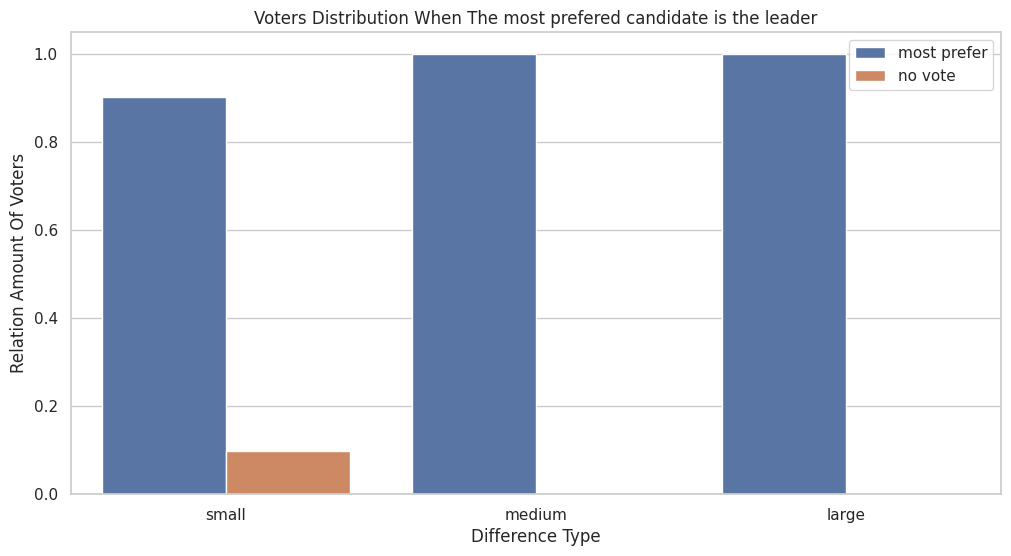

In [6]:
prefer1= concatenated_df[concatenated_df['most_preffer']==1]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='diff_type', y='relation_count', data=prefer1,hue='selected_choice')


handles, labels = bar_plot.get_legend_handles_labels()
new_labels = ['most prefer', 'no vote']
bar_plot.legend(handles=handles, labels=new_labels, title='')

# Add titles and labels
plt.title('Voters Distribution When The most prefered candidate is the leader', fontsize=12)
plt.xlabel('Difference Type', fontsize=12)
plt.ylabel('Relation Amount Of Voters', fontsize=12)

# Show the plot
plt.show()

### **Least Candidate is The Leader**

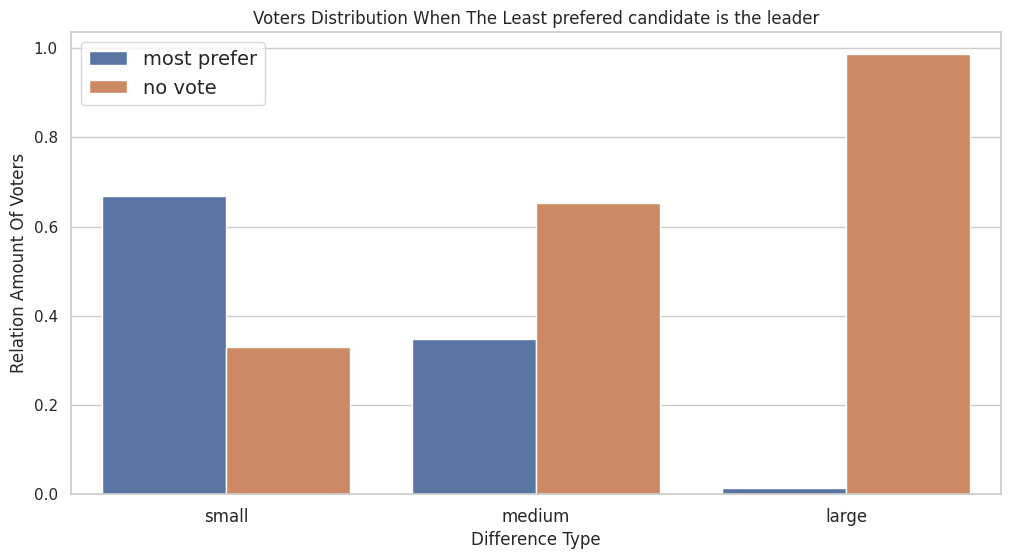

In [10]:
prefer1= concatenated_df[concatenated_df['most_preffer']==2]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='diff_type', y='relation_count', data=prefer1,hue='selected_choice')

handles, labels = bar_plot.get_legend_handles_labels()
new_labels = ['most prefer', 'no vote']
bar_plot.legend(handles=handles, labels=new_labels, title='',fontsize=14)
# Add titles and labels
plt.title('Voters Distribution When The Least prefered candidate is the leader', fontsize=12)
plt.xlabel('Difference Type', fontsize=12)
plt.ylabel('Relation Amount Of Voters', fontsize=12)
plt.xticks(fontsize=12)
# Show the plot
plt.show()

## **The connection between the utility of no vote to voting this options**

In [10]:
filterd_df_utility_least = df_polls[(df_polls['most_preffer'] == 2) & (df_polls['selected_choice'] == 'No Vote')]
filterd_df_utility_least = filterd_df_utility_least[['selected_choice','diff_type','most_preffer','utility_choice']].value_counts().reset_index()
filterd_df_utility_least

,selected_choice,diff_type,most_preffer,utility_choice,count
0,No Vote,large,2,3,48
1,No Vote,large,2,1,47
2,No Vote,large,2,2,47
3,No Vote,medium,2,20,39
4,No Vote,medium,2,10,36
5,No Vote,small,2,20,30
6,No Vote,medium,2,1,19
7,No Vote,small,2,10,15
8,No Vote,small,2,1,3


In [11]:
amount_voters_df = filterd_df_utility_least.groupby(['most_preffer','diff_type'])['count'].sum().reset_index()
amount_voters_df = amount_voters_df.rename(columns={'count': 'Amount Voters'})

filterd_df_utility_least_Relative = pd.merge(filterd_df_utility_least, amount_voters_df, on=['diff_type', 'most_preffer'], how='inner')
filterd_df_utility_least_Relative['relation_count'] = filterd_df_utility_least_Relative['count'] / filterd_df_utility_least_Relative['Amount Voters']

filterd_df_utility_least_Relative

,selected_choice,diff_type,most_preffer,utility_choice,count,Amount Voters,relation_count
0,No Vote,large,2,3,48,142,0.338028
1,No Vote,large,2,1,47,142,0.330986
2,No Vote,large,2,2,47,142,0.330986
3,No Vote,medium,2,20,39,94,0.414894
4,No Vote,medium,2,10,36,94,0.382979
5,No Vote,medium,2,1,19,94,0.202128
6,No Vote,small,2,20,30,48,0.625000
7,No Vote,small,2,10,15,48,0.312500
8,No Vote,small,2,1,3,48,0.062500


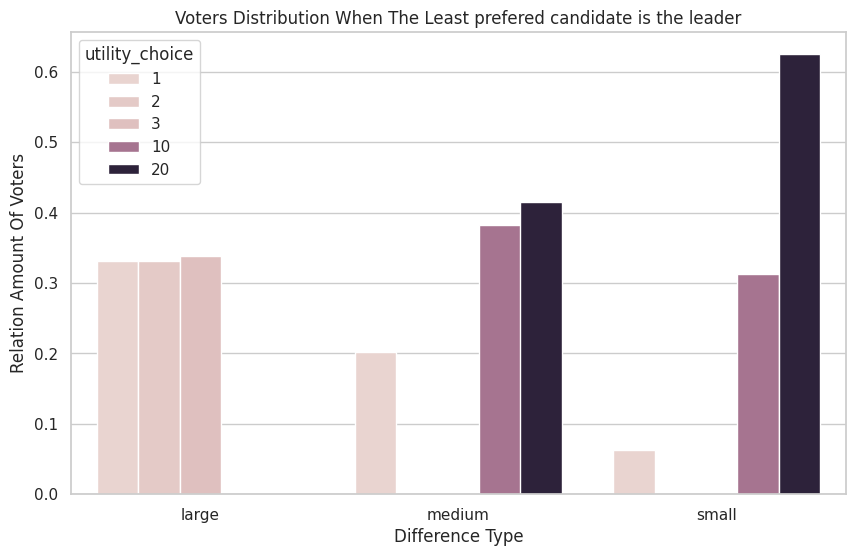

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='diff_type', y='relation_count', data=filterd_df_utility_least_Relative ,hue='utility_choice')
plt.title('Voters Distribution When The Least prefered candidate is the leader', fontsize=12)
plt.xlabel('Difference Type', fontsize=12)
plt.ylabel('Relation Amount Of Voters', fontsize=12)
plt.show()

## **The Connection to Sample Size To Voting Action**

In [11]:
sample_size_choice = df_polls[['selected_choice','sample_size']].groupby('sample_size').value_counts().reset_index()
amount_voters_df = sample_size_choice.groupby(['sample_size'])['count'].sum().reset_index()
amount_voters_df = amount_voters_df.rename(columns={'count': 'Amount Voters'})

relation_sample_size_choice = pd.merge(sample_size_choice, amount_voters_df, on=['sample_size'], how='inner')

relation_sample_size_choice['relation_count'] = relation_sample_size_choice['count'] / relation_sample_size_choice['Amount Voters']
relation_sample_size_choice

,sample_size,selected_choice,count,Amount Voters,relation_count
0,100,red,139,216,0.643519
1,100,No Vote,77,216,0.356481
2,10100,red,147,217,0.677419
3,10100,No Vote,70,217,0.322581
4,120100,red,140,217,0.645161
5,120100,No Vote,77,217,0.354839
6,1000000,red,142,216,0.657407
7,1000000,No Vote,74,216,0.342593


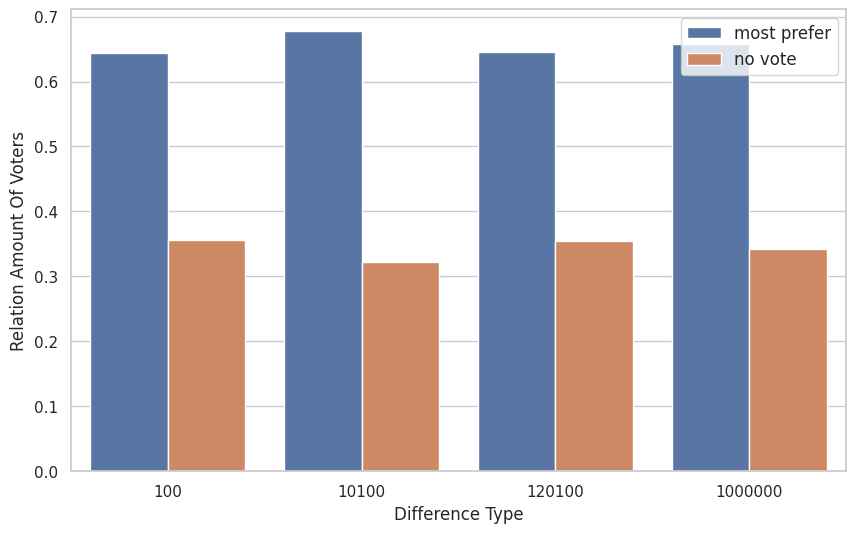

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='sample_size', y='relation_count', data=relation_sample_size_choice ,hue='selected_choice')

handles, labels = bar_plot.get_legend_handles_labels()
new_labels = ['most prefer', 'no vote']
bar_plot.legend(handles=handles, labels=new_labels, title='', fontsize=12)

plt.xlabel('Difference Type', fontsize=12)
plt.ylabel('Relation Amount Of Voters', fontsize=12)
plt.show()